In [2]:
import random

from qutip import *
from qiskit.visualization import array_to_latex
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.optimize import curve_fit
from scipy.stats import chisquare

# 1)

## 1.A)

<ErrorbarContainer object of 3 artists>

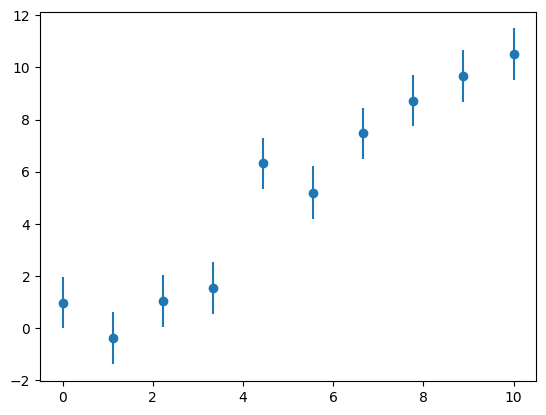

In [61]:
slope = 1
offset = 0.25
time = np.linspace(0,10,10)
data = np.random.normal(slope*time + offset,1)
sigma = 1*np.random.normal(np.ones(len(data)),0.01)

plt.errorbar(time,data,yerr=sigma,fmt='o')

## 1.B)

First, lets take a look at the linear fit

In [62]:
def func_linear(x, a, b):
    return a*x + b

In [63]:
lin_fit = curve_fit(func_linear, time, data, sigma=sigma)
print("Linear fit parameters: a={:0.4f}, b={:0.4f}".format(lin_fit[0][0], lin_fit[0][1]))

Linear fit parameters: a=1.1479, b=-0.6148


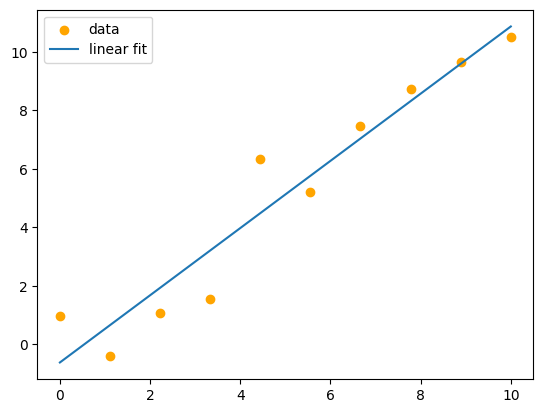

In [64]:
plt.scatter(time, data, label='data', color='orange')
plt.plot(time, func_linear(time, *lin_fit[0]), label='linear fit')
plt.legend()
plt.show()

Next, lets take a look at the quadtatic fit.

In [65]:
def func_quadratic(x, a, b, c):
    return a * x**2 + b * x + c

In [66]:
quad_fit = curve_fit(func_quadratic, time, data, sigma=sigma)
print("Quadratic fit parameters: a={:0.4f}, b={:0.4f}, c={:0.4f}".format(quad_fit[0][0], quad_fit[0][1], quad_fit[0][2]))

Quadratic fit parameters: a=0.0135, b=1.0132, c=-0.4167


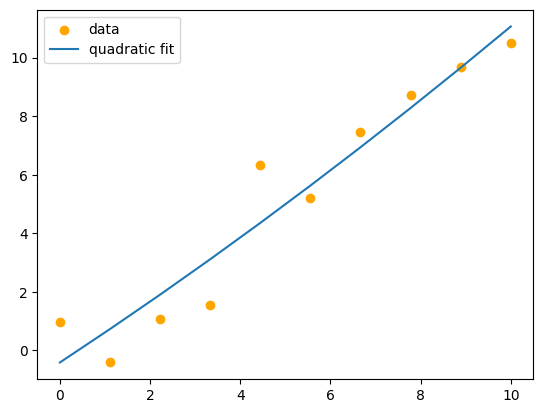

In [67]:
plt.scatter(time, data, label='data', color='orange')
plt.plot(time, func_quadratic(time, *quad_fit[0]), label='quadratic fit')
plt.legend()
plt.show()

# 1.C)

In [68]:
def chi_squared(data, model, sigma):
    sum = 0
    for i in range(len(data)):
        sum += ((data[i] - model[i])/sigma[i])**2
    return sum

In [69]:
chi_square_linear = chi_squared(data, func_linear(time, *lin_fit[0]), sigma)
v_linear = len(data) - len(lin_fit[0])
print(v_linear)
print("X^2 / V for linear fit: {:0.4f}".format(chi_square_linear/v_linear))

8
X^2 / V for linear fit: 1.4412


In [70]:
chi_square_quadratic = chi_squared(data, func_quadratic(time, *quad_fit[0]), sigma)
v_quadratic = len(data) - len(quad_fit[0])
print(v_quadratic)
print("X^2 / V for quadratic fit: {:0.4f}".format(chi_square_quadratic/v_quadratic))

7
X^2 / V for quadratic fit: 1.6257


Therefore, we can conclude that the linear fit is slightly better for fitting this data than the quadratic

# 3)

In [211]:
t_p = 1
delta = np.pi / 4
Omega = 2 * np.pi

In [212]:
def P1(t_w, Omega, delta):
    Omega_p = np.sqrt(Omega**2 + delta**2)
    return 1 - (Omega**2) / (Omega_p**4) * (Omega_p * np.cos(delta * t_w / 2) * np.sin(np.pi/2) - 2 * delta * np.sin(delta * t_w / 2) * np.sin(np.pi/4)**2 )**2

## 3.A)

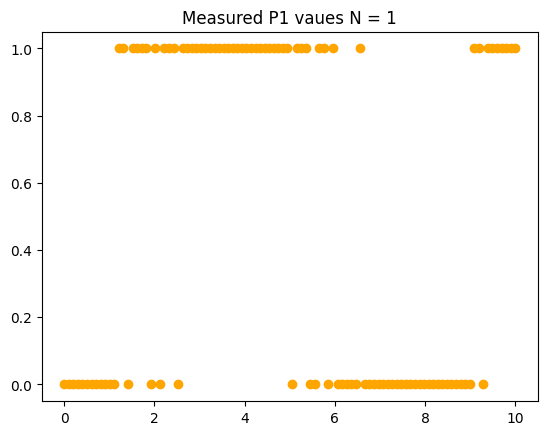

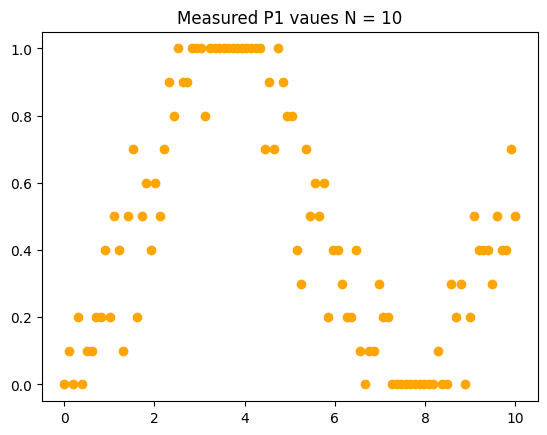

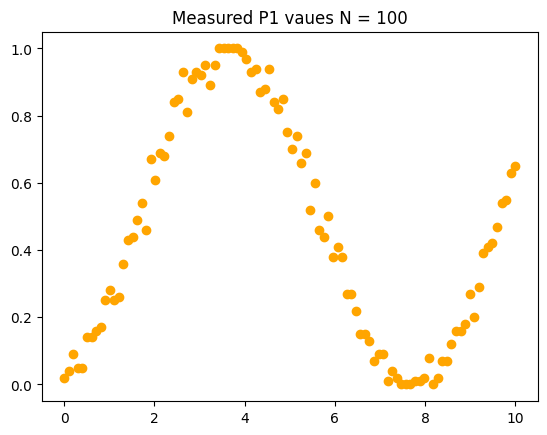

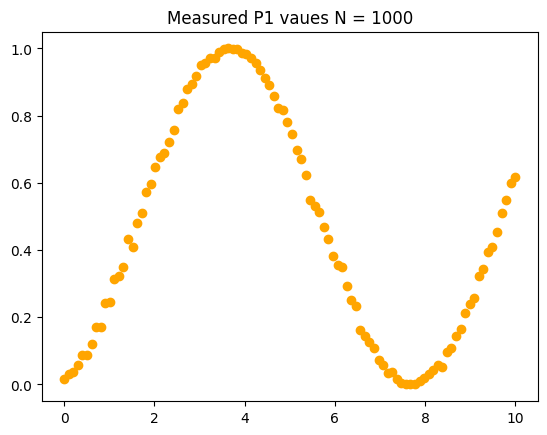

In [2]:
for N in [1, 10, 100, 1000]:
    t_w = np.linspace(0, 10, 100)
    measured_results = []
    for t in t_w:
        true_p1 = P1(t, Omega, delta)
        p1_vals = np.sum(np.random.binomial(1, true_p1, N)) / N
        measured_results.append(p1_vals)

    plt.scatter(t_w, measured_results, label='data', color='orange')
    plt.title("Measured P1 vaues N = {}".format(N))
    plt.show()


## 3.B)

In [225]:
def P1_field(t_w, Omega, gamma, phi):
    delta = (np.pi / 2 * t_w) + (2 * gamma * phi)
    Omega_p = np.sqrt(Omega**2 + delta**2)
    return 1 - (Omega**2) / (Omega_p**4) * (Omega_p * np.cos(delta * t_w / 2) * np.sin(np.pi/2) - 2 * delta * np.sin(delta * t_w / 2) * np.sin(np.pi/4)**2 )**2

Best t for N = 1 is 1.2972972972972974


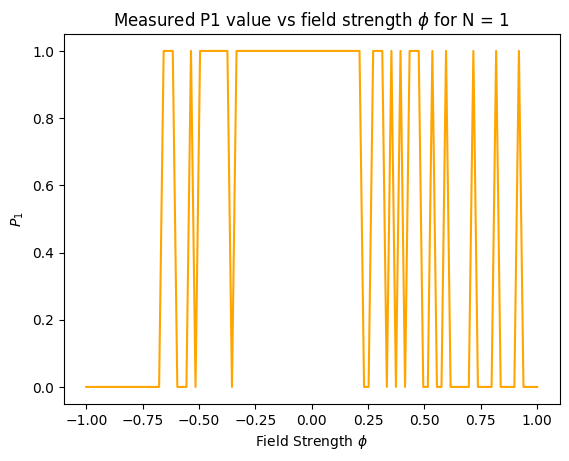

Best t for N = 10 is 1.3963963963963963


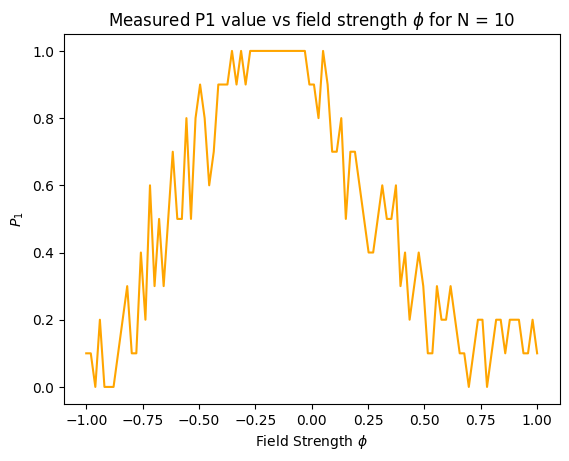

Best t for N = 100 is 1.7927927927927927


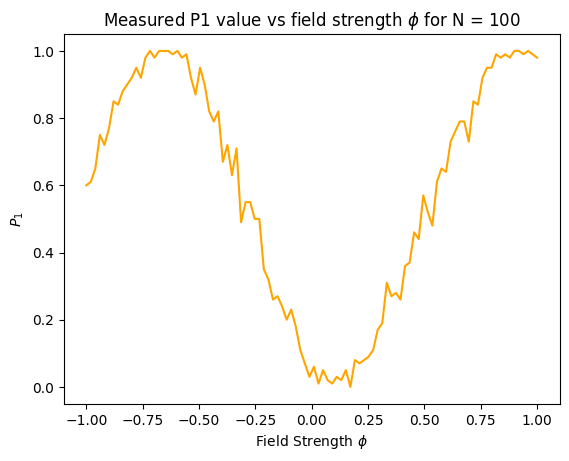

Best t for N = 1000 is 1.7927927927927927


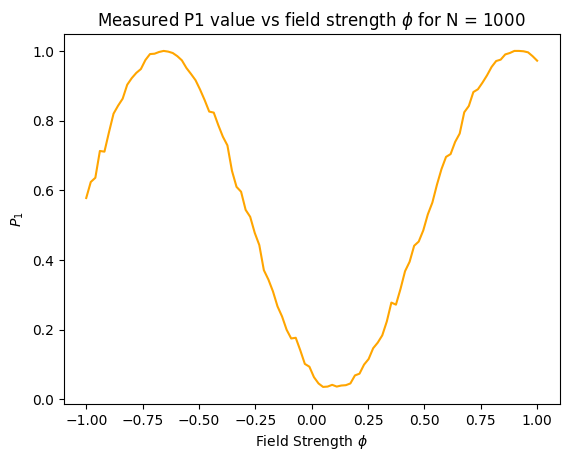

In [242]:
for N in [1, 10, 100, 1000]:
    t_w = np.linspace(1, 100, 1000)
    
    # First, find the best t by sampling around 2
    best_t = 0
    for t in t_w:
        true_p1 = P1(t, Omega, np.pi/4)
        p1_val = np.sum(np.random.binomial(1, true_p1, N)) / N
        if p1_val >= 0.5:
            best_t = t
            break
    print("Best t for N = {} is {}".format(N, best_t))

    # Now, lets plot our results relative to the strengh of the field phi
    gamma = 1
    phis = np.linspace(-1, 1, 100)
    measured_p1 = []
    for phi in phis:
        true_p1 = P1_field(best_t, Omega, gamma, phi)
        p1_val = np.sum(np.random.binomial(1, true_p1, N)) / N
        measured_p1.append(p1_val)


    plt.plot(phis, measured_p1, label='data', color='orange')
    plt.title("Measured P1 value vs field strength $\phi$ for N = {}".format(N))
    plt.xlabel("Field Strength $\phi$")
    plt.ylabel("$P_1$")
    plt.show()

As we can see, we get a linear relationship between our field strength and our shifted slope probability at $ P_1 \approx 1/2 $

## 3.C)

Now, lets plot our N=100 solution with the std error bars

Best t for N = 100 is 1.7927927927927927


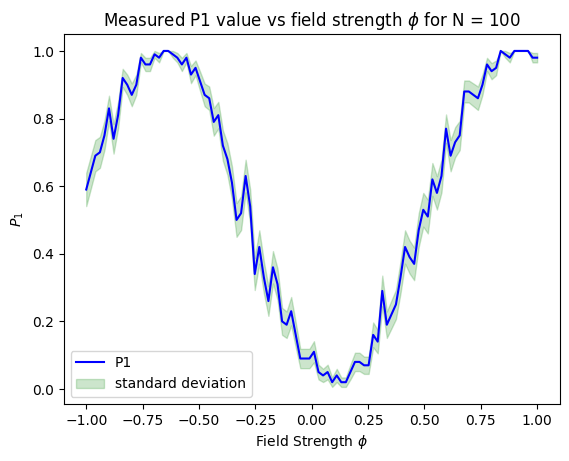

In [246]:
N = 100
t_w = np.linspace(1, 100, 1000)

# First, find the best t by sampling around 2
best_t = 0
for t in t_w:
    true_p1 = P1(t, Omega, np.pi/4)
    p1_val = np.sum(np.random.binomial(1, true_p1, N)) / N
    if p1_val >= 0.5:
        best_t = t
        break
print("Best t for N = {} is {}".format(N, best_t))

# Now, lets plot our results relative to the strengh of the field phi
gamma = 1
phis = np.linspace(-1, 1, 100)
measured_p1 = []
std_devs = []
for phi in phis:
    p1_field = P1_field(best_t, Omega, gamma, phi)
    p1_val = np.sum(np.random.binomial(1, p1_field, N)) / N
    measured_p1.append(p1_val)
    std_devs.append(np.sqrt(p1_val * (1 - p1_val) / N))

plt.plot(phis, measured_p1, label='P1', color='blue')
plt.fill_between(phis, np.array(measured_p1) - np.array(std_devs), np.array(measured_p1) + np.array(std_devs), color='green', alpha=0.2, label='standard deviation')
plt.title("Measured P1 value vs field strength $\phi$ for N = {}".format(N))
plt.xlabel("Field Strength $\phi$")
plt.ylabel("$P_1$")
plt.legend()
plt.show()

From this graph we can see that the standard error is quite small around the peak and valley of the distribution. This is expected because we expect when the slope is near zero, the error will be small. However, when the slope is near 1 or -1, the error will be larger. 

# 4)

## 4.A)

In [27]:
def U(n, t, omega):
    return (-1.j * omega * t * (create(n) * destroy(n) + 0.5 * identity(n)) ).expm()

In [4]:
n = 5
m = 1
alpha = 1
omega = 2 * np.pi
t_vals = np.linspace(0, 10, 100)

Here's what our evolved states look like from time 0 - 10 for 100 time steps.

In [43]:
evolved_states = []
for t in t_vals:
    state = U(n, t, omega) * coherent(n, alpha)
    state_p1_prob = np.abs((fock(n,0).dag() * state * fock(n,0))[0,0])**2

    evolved_states.append(state)

print("Eveolved states:")
print(evolved_states)

Eveolved states:
[Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[0.60655682]
 [0.60628133]
 [0.4303874 ]
 [0.24104351]
 [0.14552147]], Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[ 0.57627211-0.18926601j]
 [ 0.35167767-0.49386219j]
 [-0.00682851-0.43033322j]
 [-0.14597828-0.19181322j]
 [-0.13962682-0.04099813j]], Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[ 0.48844216-0.35963235j]
 [-0.1982952 -0.57293635j]
 [-0.43017072+0.0136553j ]
 [-0.06423178+0.23232789j]
 [ 0.12242045+0.07867484j]], Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[ 0.35183747-0.4940866j ]
 [-0.58172267-0.17080919j]
 [ 0.02047866+0.42989992j]
 [ 0.22377706-0.08958682j]
 [-0.09529629-0.10997779j]], Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[ 0.18009908-0.57920246j]
 [-0.47656931+0.37477825j]
 [ 0.42952089-0.02729686j]
 [-0.20681133-0.1238186j ]
 [ 0.0604518 +0.13237

## 4.B)

First, lets create a helper function that gives us $\sigma_x$ and $\sigma_p$ for our given time evolved hamiltonian

In [34]:
def get_std_dev(op):
    std_devs = []
    for t in t_vals:
        state = U(n, t, omega) * coherent(n, alpha)

        # Calculate the standard deviation of the operator
        std_dev = np.sqrt(expect(op*op, state) - expect(op, state)**2)
        std_devs.append(std_dev)

    return std_devs

Now, lets see what $\sigma_x$ vs time looks like:

In [11]:
std_devs_x = get_std_dev(position(n))

plt.plot(t_vals, std_devs_x, label='data', color='orange')
plt.title("Standard deviation of position operator vs time")
plt.xlabel("Time [t]")
plt.ylabel("Standard Deviation of position [$\sigma_x$]")
plt.ylim(0, 1)
plt.show()

NameError: name 'get_std_dev' is not defined

And here's see what $\sigma_p$ vs time looks like:

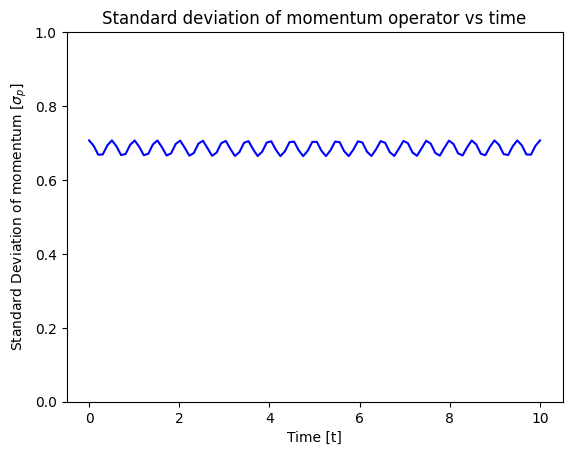

In [74]:
std_devs_p = get_std_dev(momentum(n))

plt.plot(t_vals, std_devs_p, label='data', color='blue')
plt.title("Standard deviation of momentum operator vs time")
plt.xlabel("Time [t]")
plt.ylabel("Standard Deviation of momentum [$\sigma_p$]")
plt.ylim(0, 1)
plt.show()

Lastly, lets see what $\sigma_x$ * $\sigma_p$ looks like:

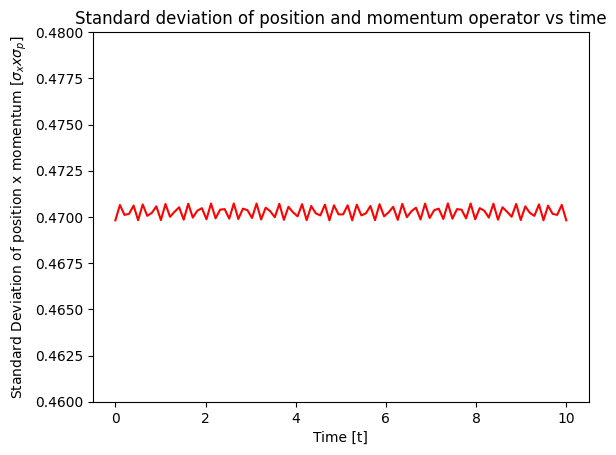

In [71]:
std_devs_xp = np.multiply(std_devs_x, std_devs_p)

plt.plot(t_vals, std_devs_xp, label='data', color='red')
plt.title("Standard deviation of position and momentum operator vs time")
plt.xlabel("Time [t]")
plt.ylabel("Standard Deviation of position x momentum [$\sigma_x x \sigma_p$]")
plt.ylim(0.46, 0.48)
plt.show()

## 4.C)

In [49]:
def get_std_dev_squeezed(op):
    r = 1
    std_devs = []
    for t in t_vals:
        state = squeeze(n, r) * U(n, t, omega) * coherent(n, alpha)

        # Calculate the standard deviation of the operator
        std_dev = np.sqrt(expect(op*op, state) - expect(op, state)**2)
        std_devs.append(std_dev)

    return std_devs

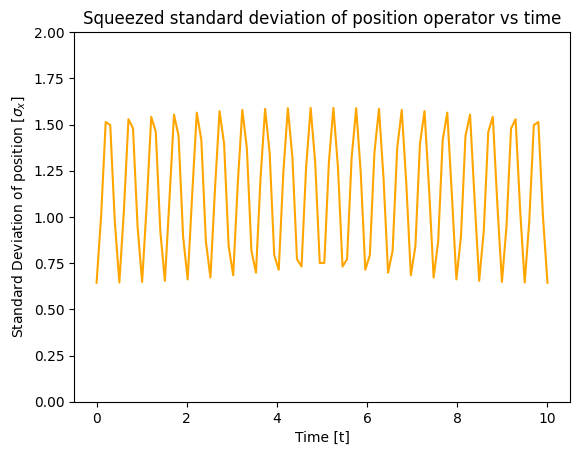

In [53]:
squeezed_std_devs_x = get_std_dev_squeezed(position(n))

plt.plot(t_vals, squeezed_std_devs_x, label='data', color='orange')
plt.title("Squeezed standard deviation of position operator vs time")
plt.xlabel("Time [t]")
plt.ylabel("Standard Deviation of position [$\sigma_x$]")
plt.ylim(0, 2)
plt.show()

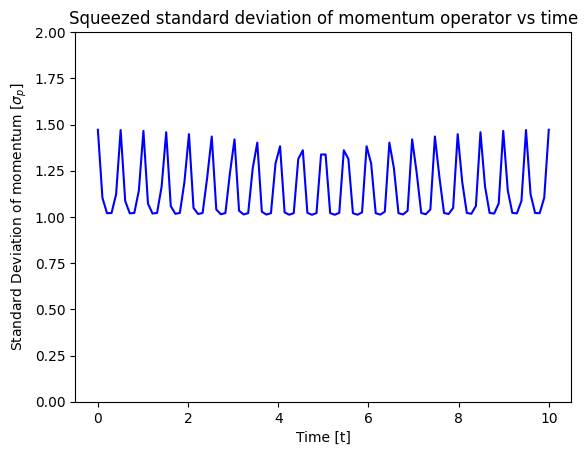

In [52]:
squeezed_std_devs_p = get_std_dev_squeezed(momentum(n))

plt.plot(t_vals, squeezed_std_devs_p, label='data', color='blue')
plt.title("Squeezed standard deviation of momentum operator vs time")
plt.xlabel("Time [t]")
plt.ylabel("Standard Deviation of momentum [$\sigma_p$]")
plt.ylim(0, 2)
plt.show()

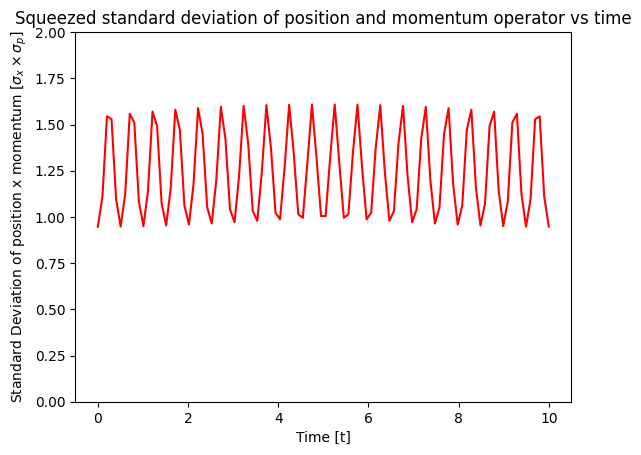

In [78]:
squeezed_std_devs_xp = np.multiply(squeezed_std_devs_x, squeezed_std_devs_p)

plt.plot(t_vals, squeezed_std_devs_xp, label='data', color='red')
plt.title("Squeezed standard deviation of position and momentum operator vs time")
plt.xlabel("Time [t]")
plt.ylabel("Standard Deviation of position x momentum [$\sigma_x \\times \sigma_p$]")
plt.ylim(0, 2)
plt.show()

We can clearly see that the values of $\sigma_x$ and $\sigma_p$ are no longer the same. This is due to the fact that we 'squeezed' the system. This means that as we evolve the system, the values of $\sigma_x$ and $\sigma_p$ will oscillate between the same and different. This allows us to get a better measurement for position or momentum at a given time.

## 4.D)

Lets create a fucntion that will give us the driven QHO with respect to the position operator:

In [3]:
def H_B1_drive_coeff(t, args):
    omega = args['omega']
    B1 = args['B1']

    return B1 * np.exp(np.sin(2 * omega * t))

def H_B2_drive_coeff(t, args):
    omega = args['omega']
    B2 = args['B2']

    return B2 * np.exp(np.sin(2 * omega * t))

Next, lets plug this into a solver starting at the ground state. Our drive will create a coherent state and squeeze our QHO - which will offset the values of $\sigma_x$ and $\sigma_p$ over time.

In [12]:
n = 5
omega = 2 * np.pi
psi0 = fock(n, 0)
t_vals = np.linspace(0, 2*np.pi, 100)
B1 = 1
B2 = 1

QHO_H = create(n) * destroy(n) + 0.5 
H_B1 = position(n)
H_B2 = position(n)**2

H = [QHO_H, [H_B1, H_B1_drive_coeff], [H_B2, H_B2_drive_coeff]]
print(H)

res = sesolve(H, psi0, t_vals, args={'n': n, 'omega': omega, 'B1': B1, 'B2': B2})
res_states = res.states

[Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[0.5 0.  0.  0.  0. ]
 [0.  1.5 0.  0.  0. ]
 [0.  0.  2.5 0.  0. ]
 [0.  0.  0.  3.5 0. ]
 [0.  0.  0.  0.  4.5]], [Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[0.         0.70710678 0.         0.         0.        ]
 [0.70710678 0.         1.         0.         0.        ]
 [0.         1.         0.         1.22474487 0.        ]
 [0.         0.         1.22474487 0.         1.41421356]
 [0.         0.         0.         1.41421356 0.        ]], <function H_B1_drive_coeff at 0x7f8c42902ef0>], [Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[0.5        0.         0.70710678 0.         0.        ]
 [0.         1.5        0.         1.22474487 0.        ]
 [0.70710678 0.         2.5        0.         1.73205081]
 [0.         1.22474487 0.         3.5        0.        ]
 [0.         0.         1.73205081 0. 

In [13]:
def get_driven_QHO_exp_val(op, states):
    exp_vals = []
    for state in states:
        exp_val = expect(op, state)
        exp_vals.append(exp_val)

    return exp_vals

In [14]:
def get_driven_QHO_std_dev(op, states):
    std_devs = []
    for state in states:
        # Calculate the standard deviation of the operator
        std_dev = np.sqrt(expect(op*op, state) - expect(op, state)**2)
        std_devs.append(std_dev)

    return std_devs

First, lets look at $\sigma_x$ vs time:

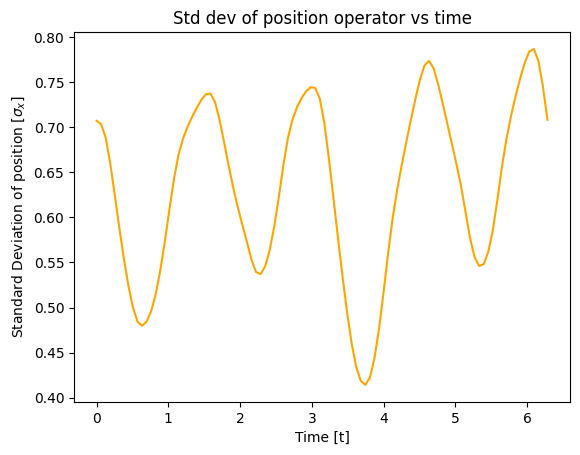

In [15]:
driven_x_std_dev = get_driven_QHO_std_dev(position(n), res_states)
plt.plot(t_vals, driven_x_std_dev, label='data', color='orange')
plt.title("Std dev of position operator vs time")
plt.xlabel("Time [t]")
plt.ylabel("Standard Deviation of position [$\sigma_x$]")
plt.show()

We see that our $\sigma_x$ is oscillating between the same and different values. This is due to the fact that we are squeezing the system. This means that we are offsetting the values of $\sigma_x$ and $\sigma_p$ over time.

Next, lets look at $\sigma_p$ vs time:

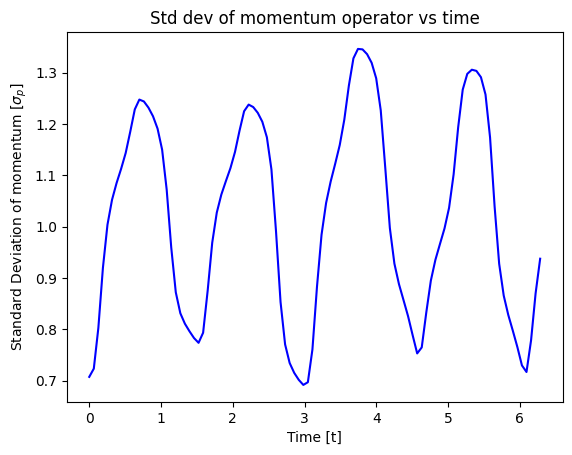

In [16]:
driven_p_std_dev = get_driven_QHO_std_dev(momentum(n), res_states)
plt.plot(t_vals, driven_p_std_dev, label='data', color='blue')
plt.title("Std dev of momentum operator vs time")
plt.xlabel("Time [t]")
plt.ylabel("Standard Deviation of momentum [$\sigma_p$]")
plt.show()

We can clearly see that $\sigma_p$ also changes over time.

Lastly, lets look at the combined relation:

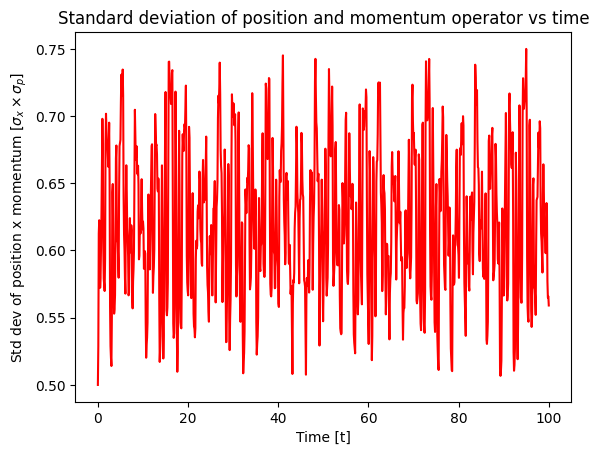

In [40]:
driven_xp_std_dev = np.multiply(driven_x_std_dev, driven_p_std_dev)
plt.plot(t_vals, driven_xp_std_dev, label='data', color='red')
plt.title("Standard deviation of position and momentum operator vs time")
plt.xlabel("Time [t]")
plt.ylabel("Std dev of position x momentum [$\sigma_x \\times \sigma_p$]")
plt.show()

From these results, we can clearly see that our system is in fact being 'squeezed'. This means that we are offsetting the values of $\sigma_x$ and $\sigma_p$ over time.

## 4.E)

Lastly, lets see if we can make sense of these B1 and B2 values in our drive. Lets start by adjusting B1 and see how it varies our squeezing:

In [41]:
psi0 = fock(n, 0)
t_vals = np.linspace(0, 100, 1000)
B1 = 0
B2 = 1

QHO_H = create(n) * destroy(n) + 0.5 * identity(n)
H_B1 = position(n)
H_B2 = position(n)**2

H = [QHO_H, [H_B1, H_B1_drive_coeff], [H_B2, H_B2_drive_coeff]]

res_B_vals = sesolve(H, psi0, t_vals, args={'n': n, 'omega': omega, 'B1': B1, 'B2': B2})
res_states_B_vals = res_B_vals.states

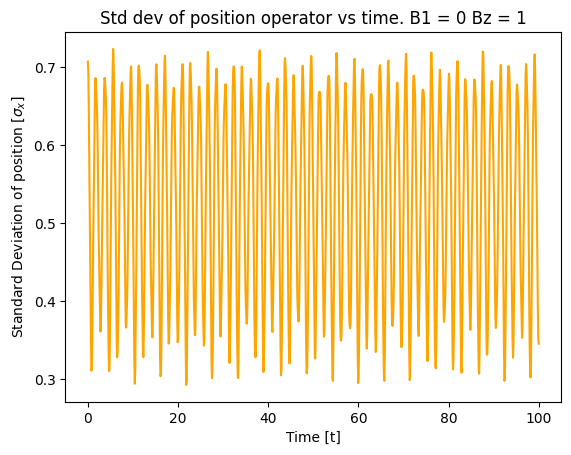

In [42]:
driven_x_std_dev_B_vals = get_driven_QHO_std_dev(position(n), res_states_B_vals)
plt.plot(t_vals, driven_x_std_dev_B_vals, label='data', color='orange')
plt.title(f"Std dev of position operator vs time. B1 = {B1} Bz = {B2}")
plt.xlabel("Time [t]")
plt.ylabel("Standard Deviation of position [$\sigma_x$]")
plt.show()

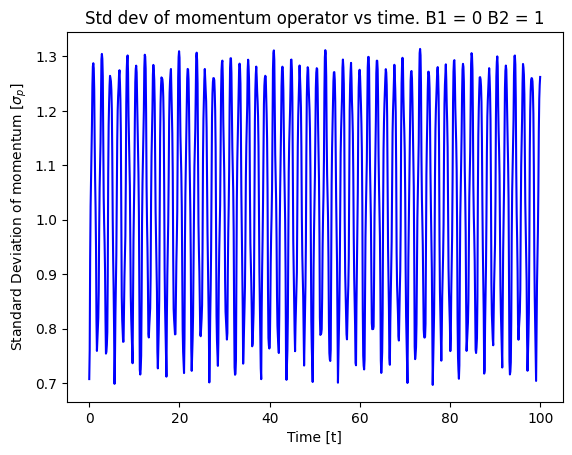

In [43]:
driven_p_std_dev_B_vals = get_driven_QHO_std_dev(momentum(n), res_states_B_vals)
plt.plot(t_vals, driven_p_std_dev_B_vals, label='data', color='blue')
plt.title(f"Std dev of momentum operator vs time. B1 = {B1} B2 = {B2}")
plt.xlabel("Time [t]")
plt.ylabel("Standard Deviation of momentum [$\sigma_p$]")
plt.show()

When we set B1 to 0, it appears that our position stay relatively constant with eachother. This imples that our B1 strength must be linked to the squeezing of our system.

In [332]:
B1 = 0
B2 = 0.1

res_B_vals = sesolve(H, psi0, t_vals, args={'n': n, 'omega': omega, 'B1': B1, 'B2': B2})
res_states_B_vals = res_B_vals.states

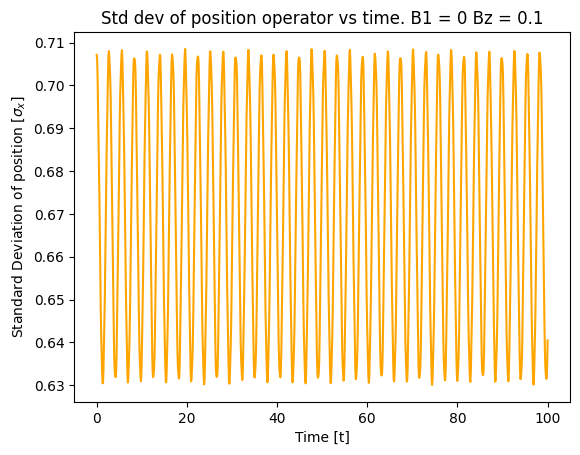

In [333]:
driven_x_std_dev_B_vals = get_driven_QHO_std_dev(position(n), res_states_B_vals)
plt.plot(t_vals, driven_x_std_dev_B_vals, label='data', color='orange')
plt.title(f"Std dev of position operator vs time. B1 = {B1} Bz = {B2}")
plt.xlabel("Time [t]")
plt.ylabel("Standard Deviation of position [$\sigma_x$]")
plt.show()

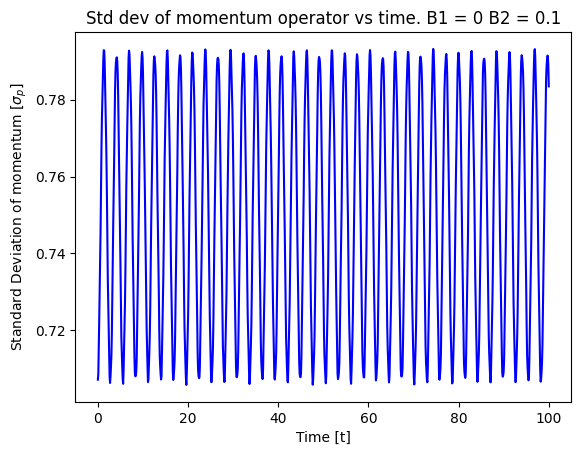

In [334]:
driven_p_std_dev_B_vals = get_driven_QHO_std_dev(momentum(n), res_states_B_vals)
plt.plot(t_vals, driven_p_std_dev_B_vals, label='data', color='blue')
plt.title(f"Std dev of momentum operator vs time. B1 = {B1} B2 = {B2}")
plt.xlabel("Time [t]")
plt.ylabel("Standard Deviation of momentum [$\sigma_p$]")
plt.show()

When we make B2 nearly zero, we see that our oscillations are much smaller. This implies that B2 is linked to the oscillations of our squeezing.